# **Introductory EDA on IMA Data**

Database created by the RRUFF Project in partnership with International Mineralogical Association (IMA). It contains a complete set of high quality spectral data from well characterized minerals. 

En el siguiente trabajo se muestran los procedimientos introductorios de EDA ejecutados para ingresar, leer, manipular y modificar los valores de datos presentes en la tabla.

Los objetivos son descubrir cuáles son los países con mayor cantidad de minerales, los elementos más abundante y de mayor antiguedad. Se emplearon las columnas Mineral, Country, Elements y Age (Ma).

**Results**

From IMA Data:

1. Countries with more minerals:
   * **United States of America: 825**
   * **Russia: 803**
   * **Italy: 370**
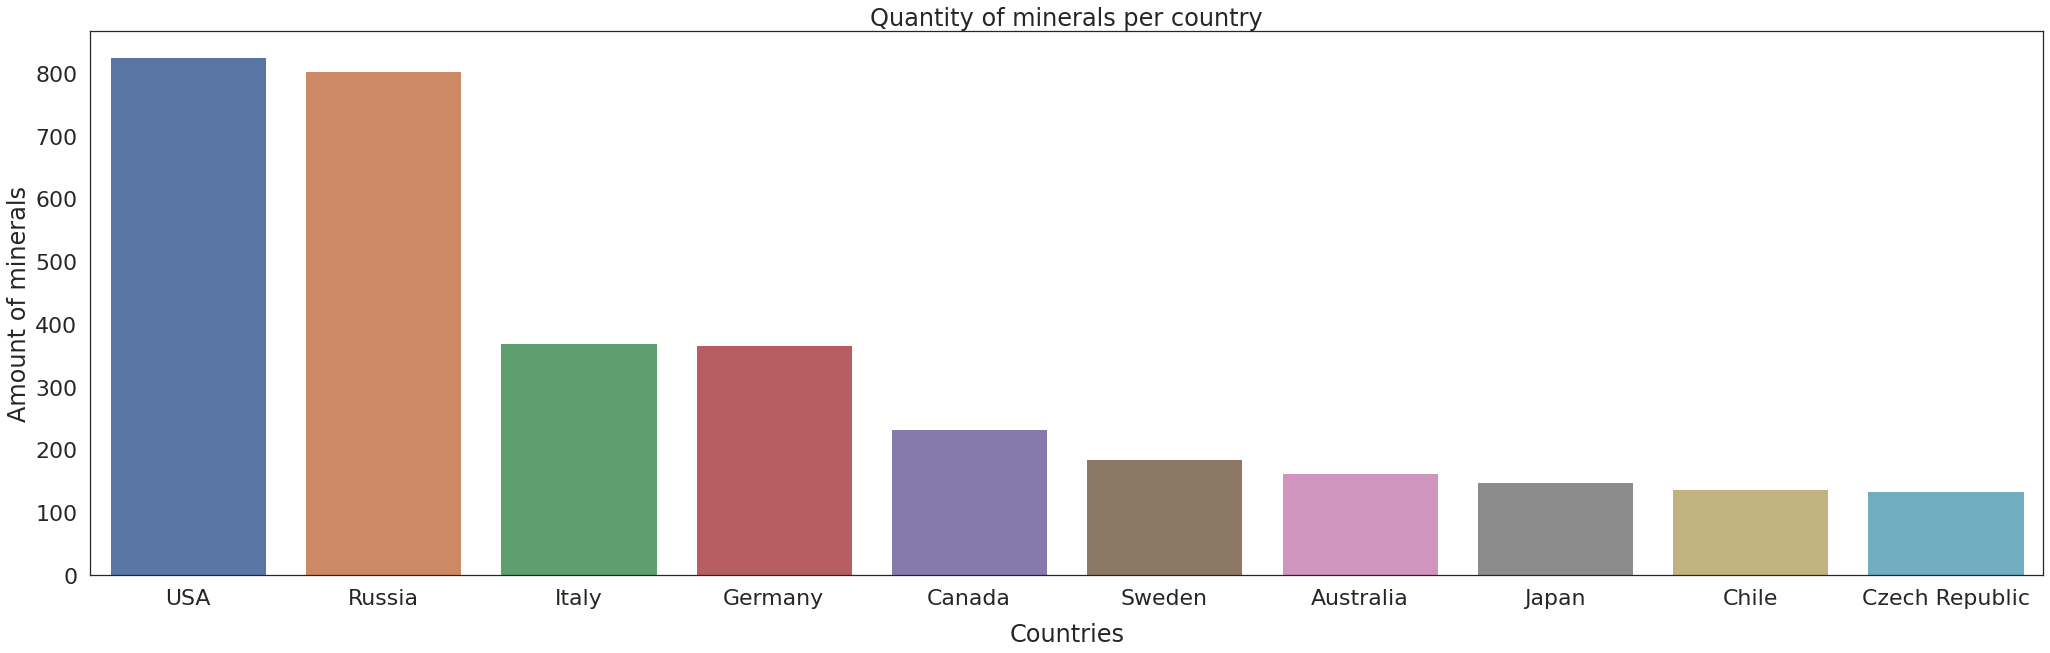

2. Most abundant chemistry elements:
    * **Oxygen**
    * **Hydrogen**
    * **Calcium**    
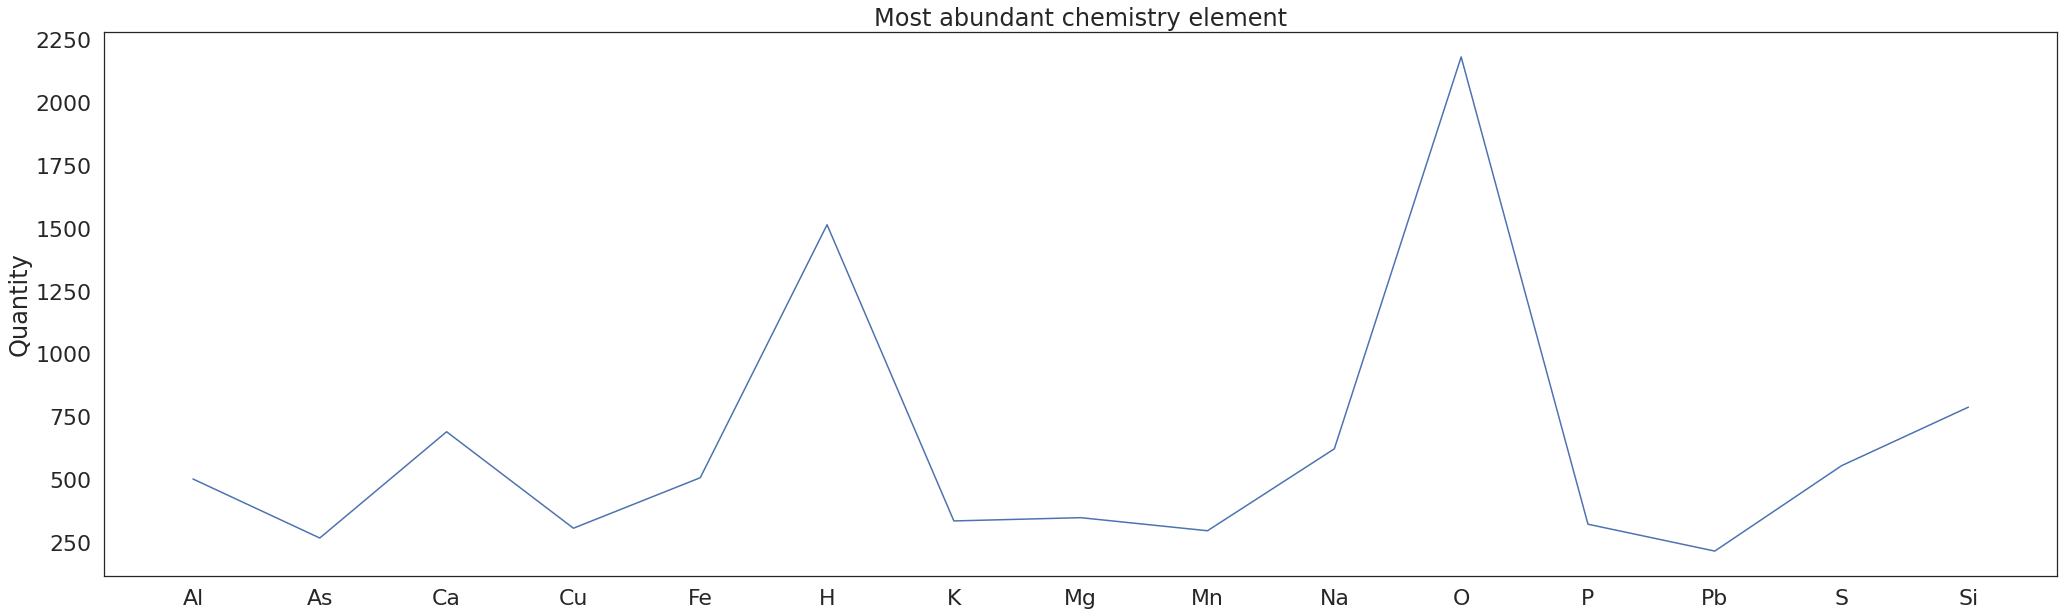

3. Oldests minerals:
    * **Tochilinite (meteorite)**: 4.7 (Ma)
    * **Machiite (meteorite)**: 4.7 (Ma) 
    * **Troilite (meteorite)**: 4.7 (Ma)

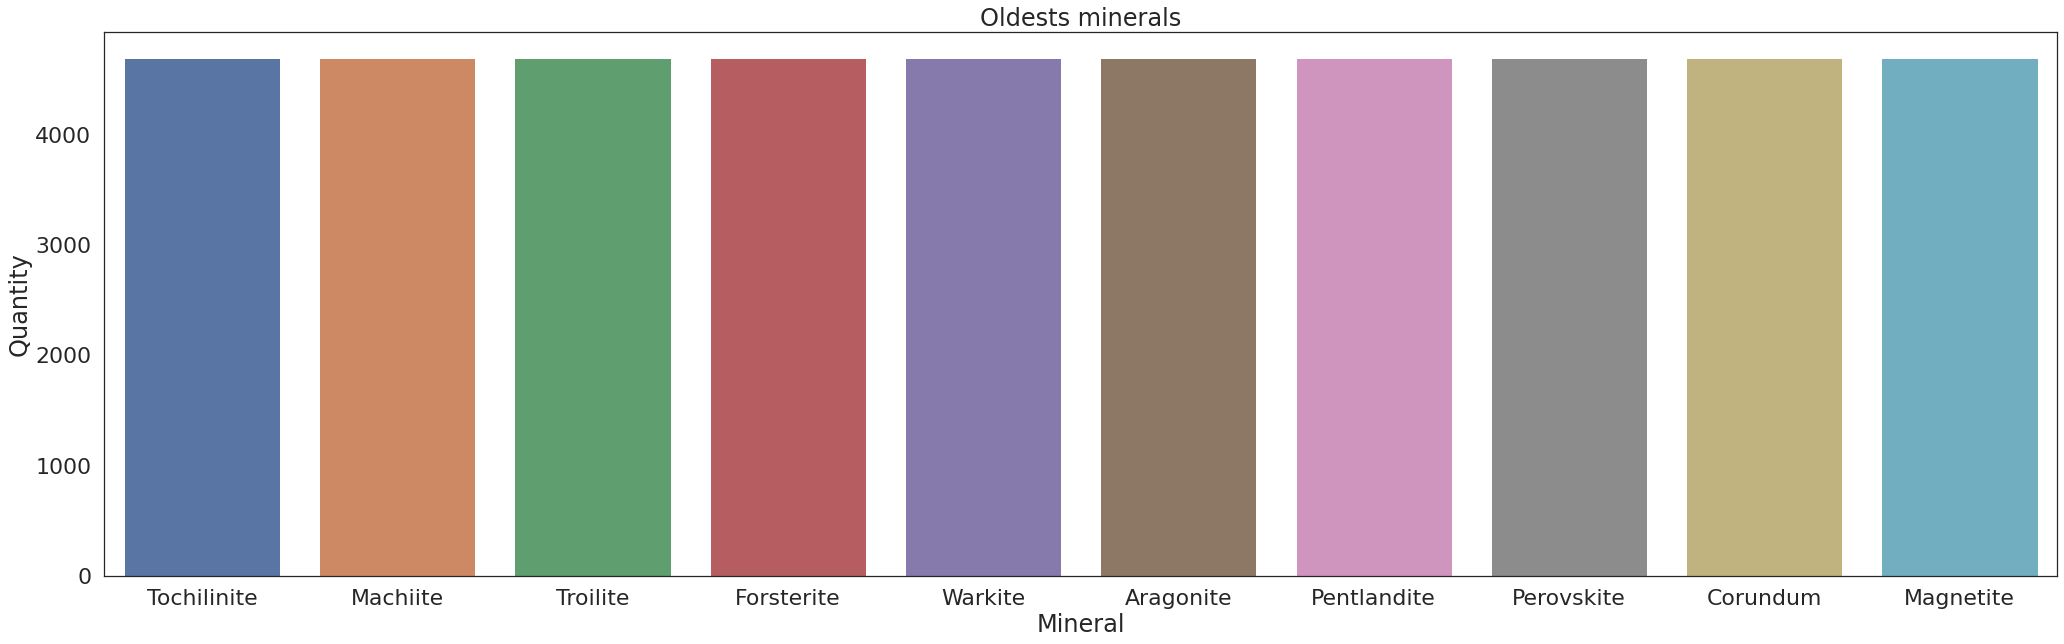

# Table of Contents

1. [Mission](#mission)
1. [Data description](#datadescription)
    1. [Reading data](#load)
1. [Missing data](#missingvalues)
    1. [Solution](#missingsolution)
1. [Fixing data](#fixing)
    1. [Country](#colcountry)
    1. [Elements](#colelements)
    1. [Age (Ma)](#colage) 
1. [Data plot](#plots)
    1. [Country](#plotcountry)
    1. [Elements](#plotelement)
    1. [Age (Ma)](#plotage) 
1. [Results](#results)
    1. [Minerals provided by different countries](#mineralscountry)
    1. [Most abundant elements](#elementabundant)
    1. [Oldest mineral](#oldestmineral) 
1. [References](#references)



********

# **MISSION**<a id="mission" ></a><br>

1. Find which minerals are provided by different countries.
2. Find the most abundant chemistry element.
3. Find the oldest mineral.


********

# **DATA DESCRIPTION**<a id="datadescription" ></a><br>

> * **Mineral Name**: common name (Abswurmbachite, Achalaite, Ferrihydrite, Langite, Silver, Gold, Cooper, etc.)
> * **RRUFF Chemistry**: RRUFF chemical formula (Cu2+Mn3+6O8(SiO4), Fe2+Ti4+Nb5+2O8, etc.)
> * **IMA Chemistry**: IMA chemical formula (Cu2+Mn3+6O8(SiO4), Fe2+TiNb2O8, etc.)
> * **Chemistry Elements**: chemistry elements in mineral assembly (Cu: cooper, Mn: manganese, O: oxygen, Si: silicon, etc.)
> * **IMA Number**: IMA identification number (if applies) (IMA1990-007, IMA2013-103, etc.)
> * **RRUFF IDs**: RRUFF id (if applies) (R070578 R080016, R070037, etc.)
> * **Country of Type** Locality: country of type locality (site of first official geological description) (Greece, 'unknown', '?', etc.)
> * **Year First Published**: year of the first official geological description (2014, etc.)
> * **IMA Status: official** status of IMA assignment (Approved, Grandfathered, Pending publication, Renamed, etc.)
> * **Structural Groupname**: mineral structural group (Sapphirine, etc.)
> * **Fleischers Groupname**: Fleischers mineral structural group (autunite, etc.)
> * **Status Notes**: references ((McDonald A M, Chao G Y, Grice J D (1994)), etc.)
> * **Crystal Systems**: group of lattice system (triclinic, hexagonal, etc.)
> * **Oldest Known Age (Ma)**: age of minerals (Ma = million years) (370, 56, etc.)

********

# Reading data<a id="load" ></a><br>

In [1]:
# Visualizations on notebook
%matplotlib inline

# Python imports
import os, math, time, random

# Data manipulation
import numpy as np # Linear algebra
import pandas as pd # Data processing


# Data visualization
import matplotlib.pyplot as plt
import geopandas as gpd # Geospatial visualization
import missingno # Missing data visualization
import seaborn as sns # Data visualization
sns.set()

# Text manipulation
import chardet
import fuzzywuzzy
import regex
from pandas_profiling import ProfileReport # Report generator

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ima-database-of-mineral-properties/RRUFF_Export_20191025_022204.csv


In [2]:
minerals = pd.read_csv('/kaggle/input/ima-database-of-mineral-properties/RRUFF_Export_20191025_022204.csv')

minerals.head()

,Mineral Name,RRUFF Chemistry (plain),IMA Chemistry (plain),Chemistry Elements,IMA Number,RRUFF IDs,Country of Type Locality,Year First Published,IMA Status,Structural Groupname,Fleischers Groupname,Status Notes,Crystal Systems,Oldest Known Age (Ma)
0,Abellaite,NaPb2+2(CO3)2(OH),NaPb2(CO3)2(OH),Na Pb C O H,IMA2014-111,NaN,Spain,2014.0,Approved,,,"Ibáñez-Insa J, Elvira J J, Llovet X, Pérez-Can...",hexagonal,370.0
1,Abelsonite,Ni2+C31H32N4,NiC31H32N4,Ni C H N,IMA1975-013,R070007,USA,1975.0,Approved,,,"Milton C, Dwornik E J, Estep-Barnes P A, Finke...",triclinic,56.0
2,Abenakiite-(Ce),Na26Ce3+6(SiO3)6(P5+O4)6(C4+O3)6(S4+O2)O,Na26Ce6(Si6O18)(PO4)6(CO3)6(SO2)O,Na Ce Si O P C S,IMA1991-054,NaN,Canada,1991.0,Approved,,,"McDonald A M, Chao G Y, Grice J D (1994) Abena...",hexagonal,124.0
3,Abernathyite,K(U6+O2)As5+O4·3H2O,K(UO2)(AsO4)·3H2O,K U O As H,NaN,NaN,USA,1956.0,Grandfathered|Approved,Natroautunite,autunite,"Thompson M E, Ingram B, Gross E B (1956) Abern...",tetragonal,358.9
4,Abhurite,Sn2+21O6(OH)14Cl16,Sn2+21O6(OH)14Cl16,Sn O H Cl,IMA1983-061,R060227,Saudi Arabia,1983.0,Approved,,,"Matzko J J, Evans H T, Mrose M E, Aruscavage P...",hexagonal,0.0


In [3]:
minerals.tail()

,Mineral Name,RRUFF Chemistry (plain),IMA Chemistry (plain),Chemistry Elements,IMA Number,RRUFF IDs,Country of Type Locality,Year First Published,IMA Status,Structural Groupname,Fleischers Groupname,Status Notes,Crystal Systems,Oldest Known Age (Ma)
5734,Zussmanite,"K(Fe2+,Mg,Mn2+,Fe3+)13(Si,Al)18O42(OH)14","K(Fe,Mg,Mn)13(Si,Al)18O42(OH)14",K Fe Mg Mn Si Al O H,IMA1964-018,R050448,USA,1964.0,Approved,Clay,,"Agrell S O, Bown M G, McKie D (1965) Deerite, ...",hexagonal,NaN
5735,Zvyaginite,Na2Zn2+Ti4+Nb5+2(Si2O7)2O2(OH)2(H2O)4,Na2ZnTiNb2(Si2O7)2O2(OH)2(H2O)4,Na Zn Ti Nb Si O H,IMA2013-071,NaN,Russia,2013.0,Redefined|Approved,Seidozerite-Lamprophyllite,,"Pekov I V, Lykova I S, Chukanov N V, Yapaskurt...",triclinic,370.0
5736,Zvyagintsevite,Pd3Pb,Pd3Pb,Pd Pb,IMA1966-006,NaN,Russia,1966.0,Approved,Perovskite,zvyagintsevite,"Genkin A D, Murav´eva I V, Troneva N V (1966) ...",cubic,3100.0
5737,Zwieselite,Fe2+2PO4F,Fe2+2(PO4)F,Fe P O F,NaN,R050279,Germany,1841.0,Redefined|Approved,Triplite,triplite,Breithaupt J F A (1841) Phyletites ferrosus od...,monoclinic,1820.0
5738,Zýkaite,Fe3+4(As5+O4)3S6+O4(OH)·15H2O,Fe3+4(AsO4)3(SO4)(OH)·15H2O,Fe As O S H,IMA1976-039,R070477,Czech Republic,1976.0,Approved,,,"Čech F, Jansa J, Novák F (1978) Zýkaite, Fe^3+...",orthorhombic|unknown,0.0


In [4]:
minerals.shape

(5739, 14)

In [5]:
minerals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5739 entries, 0 to 5738
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Mineral Name              5739 non-null   object 
 1   RRUFF Chemistry (plain)   5739 non-null   object 
 2   IMA Chemistry (plain)     5735 non-null   object 
 3   Chemistry Elements        5735 non-null   object 
 4   IMA Number                3635 non-null   object 
 5   RRUFF IDs                 2240 non-null   object 
 6   Country of Type Locality  5540 non-null   object 
 7   Year First Published      5537 non-null   float64
 8   IMA Status                5617 non-null   object 
 9   Structural Groupname      5739 non-null   object 
 10  Fleischers Groupname      5739 non-null   object 
 11  Status Notes              5671 non-null   object 
 12  Crystal Systems           5237 non-null   object 
 13  Oldest Known Age (Ma)     4792 non-null   float64
dtypes: float

In [6]:
def unique_val(column, data):
    unique_values = data[column].unique()
    return unique_values

unique_val('Country of Type Locality', minerals)

array(['Spain', 'USA', 'Canada', 'Saudi Arabia', 'Russia', 'Greece',
       'Japan', 'Czech Republic', 'Ukraine', 'Argentina', 'Italy',
       'unknown', 'Denmark (Greenland)', 'Chile', 'Algeria (meteorite)',
       'Sweden', 'Austria', 'Mexico (meteorite)', 'Norway', 'Germany',
       'China', 'Afghanistan', 'France', 'South Africa', 'Morocco',
       'Peru', 'Mexico', 'Bolivia', 'Morocco (meteorite)', 'New Zealand',
       'Kazakhstan', 'Australia (meteorite)', 'Kyrgyzstan',
       'Romania / Turkey', 'Romania', 'Australia', 'Tajikistan',
       'Russia (meteorite)', 'Turkey', 'Brazil', 'United Kingdom',
       'Democratic Republic of the Congo', nan, 'Austria / Poland',
       'Italy ?', '?', 'Tanzania', 'Italy / Ukraine', 'Hungary',
       'Sri Lanka', 'Yemen (meteorite)', 'Namibia',
       'Kazakhstan / Kyrgyzstan', 'Switzerland', 'Antarctica',
       'Italy / Switzerland', 'Israel', 'Bulgaria', 'Belgium',
       'Canada / Namibia', 'Moon', 'Mongolia', 'Iran', 'Uzbekistan',
      

********

# **MISSING DATA**<a id="missingvalues" ></a><br>



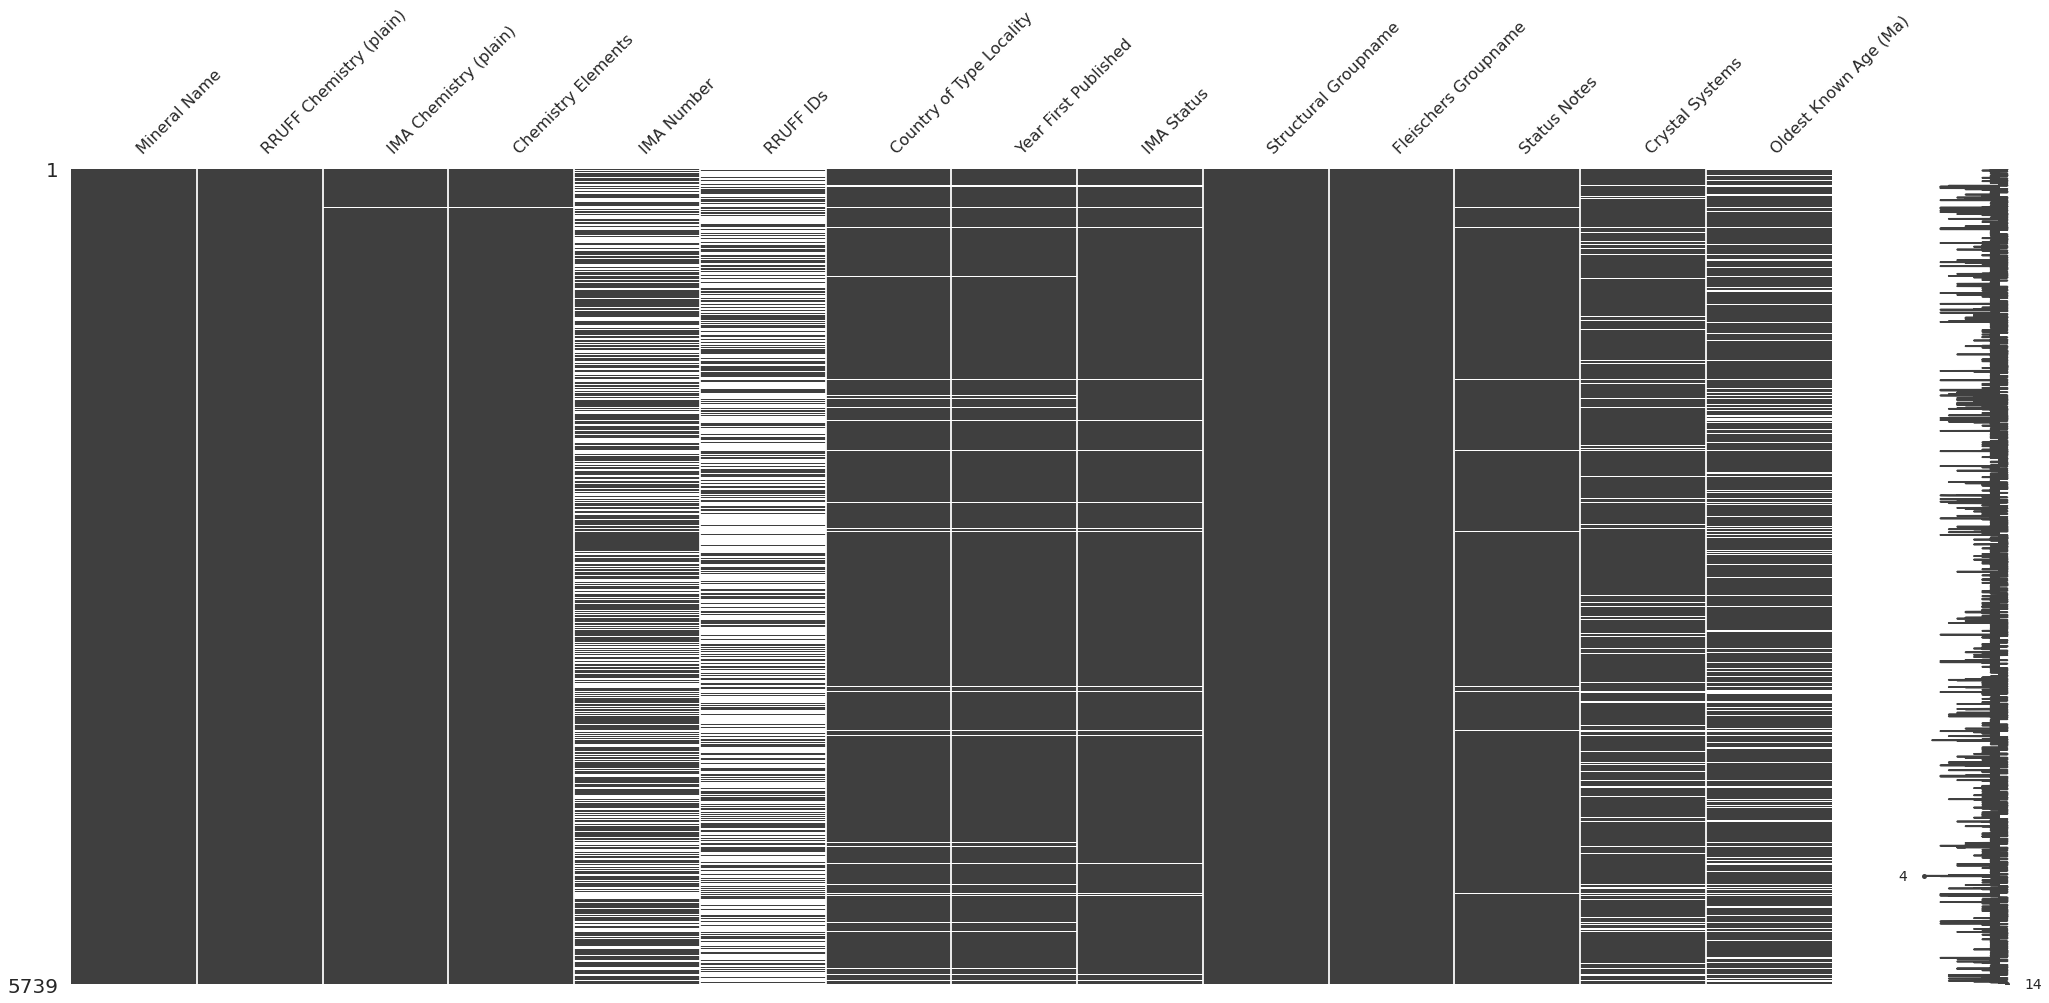

In [7]:
missingno.matrix(minerals, figsize=(35,15))

In [8]:
minerals_values_count = minerals.isnull().sum()

minerals_values_count

Mineral Name                   0
RRUFF Chemistry (plain)        0
IMA Chemistry (plain)          4
Chemistry Elements             4
IMA Number                  2104
RRUFF IDs                   3499
Country of Type Locality     199
Year First Published         202
IMA Status                   122
Structural Groupname           0
Fleischers Groupname           0
Status Notes                  68
Crystal Systems              502
Oldest Known Age (Ma)        947
dtype: int64

* **IMA Number**: not important for solution
* **RRUFF IDs**: not important for solution
* **IMA Chemistry**: important for solution
* **Country of Type Locality**: important for solution
* **Oldest Known Age (Ma)**: important for solution

********

# Solution<a id="missingsolution" ></a><br>

1. Country
   * Fill NaN's Country with Unknown
   * Strip, split and rename countries
   
   
2. Elements
   * Remove NaN values in Elements
   * Separate each chemistry element
   
   
3. Age
   * Fill NaN's Age with Unknown
   
   
* Find duplicates
* Rename columns


********

# **FIXING DATA**<a id="fixing" ></a><br>

**Duplicates**

In [9]:
dupli = minerals.duplicated()
minerals[dupli].shape

(0, 14)

**Columns rename**

In [10]:
minerals.rename(columns={'Mineral Name': 'Mineral', 'RRUFF Chemistry (plain)': 'RRUFF Chem', 'IMA Chemistry (plain)': 'IMA Chem',
                         'Chemistry Elements': 'Elements', 'IMA Number': 'IMA ID', 'RRUFF IDs': 'RRUFF ID', 
                         'Country of Type Locality': 'Country', 'Oldest Known Age (Ma)': 'Age (Ma)'}, inplace=True)
print('Done')

Done


********

# Country<a id="colcountry" ></a><br>

**Changing NaN to unknown**

In [11]:
minerals['Country'] = minerals['Country'].fillna(value='Unknown') #  Changing the NaN values to unknown

minerals['Country'].isnull().sum()

0

**Spliting, striping and renaming countries**

In [12]:
# Edited from Daria Chemkaeva, (2020).

countries_splited = minerals.set_index('Mineral')['Country'].str.split(' / ', expand=True).stack().reset_index('Mineral').reset_index(drop=True)
countries_splited.columns = ['Mineral', 'Country']

new_met = countries_splited['Country'].str.contains('meteorite', case=False), 'Country'
new_cou = countries_splited['Country'].str.contains('IDP', case=False), 'Country'

countries_splited.loc[new_met] = 'Meteorite'
countries_splited.loc[new_cou] = 'IDP'
countries_splited['Country'] = countries_splited['Country'].replace({' \?':''}, regex=True)
countries_splited['Country'] = countries_splited['Country'].replace('?', 'Unknown')

print(countries_splited[countries_splited['Country'].str.contains('Unknown', regex=False)])

countries_splited

                        Mineral  Country
119           Aluminobarroisite  Unknown
125     Alumino-ferrobarroisite  Unknown
126     Alumino-ferrohornblende  Unknown
127   Alumino-ferrotschermakite  Unknown
128       Alumino-ferrowinchite  Unknown
...                         ...      ...
5758        Zhonghuacerite-(Ce)  Unknown
5766              Zinccopperite  Unknown
5783         Zinconigerite-6N6S  Unknown
5800      Zirconolite-3<i>O</i>  Unknown
5801      Zirconolite-3<i>T</i>  Unknown

[210 rows x 2 columns]


,Mineral,Country
0,Abellaite,Spain
1,Abelsonite,USA
2,Abenakiite-(Ce),Canada
3,Abernathyite,USA
4,Abhurite,Saudi Arabia
...,...,...
5821,Zussmanite,USA
5822,Zvyaginite,Russia
5823,Zvyagintsevite,Russia
5824,Zwieselite,Germany


**Percent of data missing**

In [13]:
missing_values_count = countries_splited[countries_splited['Country'].str.contains('Unknown', regex=False)].value_counts()
total_cells = np.product(minerals['Country'].shape)
total_missing = missing_values_count.sum()
percent_missing_country = (total_missing/total_cells) * 100
print(percent_missing_country)

3.659174072138003


**Geting uniques values from Country**

In [14]:
countries_splited['Country'].value_counts()

USA                        825
Russia                     803
Italy                      370
Germany                    366
Canada                     233
                          ... 
Denmark (Faroe Islands)      1
Yemen                        1
Brasil                       1
Fiji                         1
Honduras                     1
Name: Country, Length: 131, dtype: int64

**Dropping Unknown rows from countries_splited**

In [15]:
countries_splited.drop(countries_splited[countries_splited['Country'] == 'Unknown'].index, inplace=True)

countries_splited

,Mineral,Country
0,Abellaite,Spain
1,Abelsonite,USA
2,Abenakiite-(Ce),Canada
3,Abernathyite,USA
4,Abhurite,Saudi Arabia
...,...,...
5821,Zussmanite,USA
5822,Zvyaginite,Russia
5823,Zvyagintsevite,Russia
5824,Zwieselite,Germany


********

# Elements<a id="colelements" ></a><br>

**Displaying rows with NaN values**

In [16]:
null_elements = minerals['Elements'].isnull()
minerals[null_elements]

,Mineral,RRUFF Chem,IMA Chem,Elements,IMA ID,RRUFF ID,Country,Year First Published,IMA Status,Structural Groupname,Fleischers Groupname,Status Notes,Crystal Systems,Age (Ma)
277,Arrojadite-(NaFe),Na2Fe2+(CaNa2)Fe2+13Al(PO4)11(PO3OH)(OH)2,NaN,NaN,NaN,R070298,Unknown,NaN,NaN,,,NaN,monoclinic,NaN
1752,Fluorine,F,NaN,NaN,NaN,NaN,France,1886.0,NaN,,,NaN,NaN,NaN
4020,Perkovaite,CaMg2(SO4)3,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,,,NaN,hexagonal,NaN
4974,Tadzhikite-(Y),"Ca3(Y,Ce)2(Ti,Al,Fe3+)B4Si4O22",NaN,NaN,NaN,NaN,Unknown,NaN,NaN,,,NaN,NaN,NaN


In [17]:
missing_values_count = minerals['Elements'].isnull().sum()
total_cells = np.product(minerals['Elements'].shape)
total_missing = missing_values_count.sum()
percent_missing_elems = (total_missing/total_cells) * 100
print(percent_missing_elems)

0.06969855375500958


**Removing NaN-bearing rows**

 

In [18]:
del_rows = minerals['Elements'].notna()
minerals = minerals[del_rows] #  New DF without the 4 NaN rows

minerals['Elements'].isna().sum()

0

**Spliting chemistry elements**

In [19]:
# Edited from Daria Chemkaeva, (2020).

elements_splited = minerals.set_index('Mineral')['Elements'].str.split(' ', expand=True).stack().reset_index('Mineral').reset_index(drop=True)
elements_splited.columns = ['Mineral', 'Element']

elements_splited

,Mineral,Element
0,Abellaite,Na
1,Abellaite,Pb
2,Abellaite,C
3,Abellaite,O
4,Abellaite,H
...,...,...
27227,Zýkaite,Fe
27228,Zýkaite,As
27229,Zýkaite,O
27230,Zýkaite,S


********

# Age (Ma)<a id="colage" ></a><br>



**Checking unique values**

In [20]:
minerals['Age (Ma)'].unique()

array([3.700000e+02, 5.600000e+01, 1.240000e+02, 3.589000e+02,
       0.000000e+00, 4.000000e-02, 5.410000e+02,          nan,
       4.000000e+03, 3.600000e-05, 1.275000e+03, 2.700000e+03,
       1.742000e+03, 1.890000e+03, 3.260000e+02, 4.567610e+03,
       2.613000e+03, 2.680000e+03, 2.870000e+02, 2.000000e+02,
       1.420000e+03, 5.800000e+02, 1.630000e+03, 1.600000e+03,
       9.753000e+02, 2.400000e+03, 9.460000e+02, 9.670000e+02,
       3.590000e+02, 4.190000e+02, 1.861000e+03, 2.450000e+01,
       1.240000e+03, 5.430000e+02, 1.790000e+03, 4.160000e+02,
       2.710000e+03, 3.720000e+02, 2.038000e+03, 6.233000e+02,
       4.330000e+03, 6.350000e+01, 3.000000e+00, 3.540000e+02,
       2.638000e+03, 4.620000e+03, 4.430000e+02, 1.898000e+03,
       1.287000e+01, 2.700000e+02, 2.724000e+03, 4.136000e+02,
       2.940000e+02, 5.420000e+02, 1.960000e+03, 3.815000e+02,
       3.366000e+03, 2.816000e+03, 2.698000e+03, 2.730000e+03,
       3.254000e+03, 4.000000e-01, 1.540000e+03, 2.7720

**Changing type to float**

In [21]:
minerals['Age (Ma)'] = minerals['Age (Ma)'].astype('float64')
print('Done')

Done


**Filling NaNs with Unknown**

In [22]:
minerals['Age (Ma)'] = minerals['Age (Ma)'].replace(0, 'Unknown')

minerals['Age (Ma)']

0           370
1            56
2           124
3         358.9
4       Unknown
         ...   
5734        NaN
5735        370
5736       3100
5737       1820
5738    Unknown
Name: Age (Ma), Length: 5735, dtype: object

In [23]:
minerals['Age (Ma)'] = minerals['Age (Ma)'].fillna(value='Unknown') #  Changing the NaN values to unknown

minerals['Age (Ma)']

0           370
1            56
2           124
3         358.9
4       Unknown
         ...   
5734    Unknown
5735        370
5736       3100
5737       1820
5738    Unknown
Name: Age (Ma), Length: 5735, dtype: object

In [24]:
minerals['Age (Ma)'].isna().sum()

missing_values_count = minerals['Age (Ma)'].str.contains('Unknown', regex=False).value_counts()
total_cells = np.product(minerals['Age (Ma)'].shape)
total_missing = missing_values_count.sum()
percent_missing_age = (total_missing/total_cells) * 100
print('Number of missing cells: ', missing_values_count[:1])
print('% = ', percent_missing_age)

Number of missing cells:  True    1067
Name: Age (Ma), dtype: int64
% =  18.605056669572797


In [25]:
minerals['Age (Ma)'].value_counts()[0:25]

Unknown    1067
413.6       144
3.6e-05     119
2500.0      108
541.0       107
4000.0      105
354.0        99
1898.0       88
359.0        67
500.0        53
1349.0       49
2400.0       48
370.0        48
1861.0       47
124.0        46
3640.0       43
1160.0       42
1800.0       40
252.0        38
4567.61      38
4700.0       37
245.0        37
543.0        36
1702.0       32
16.0         32
Name: Age (Ma), dtype: int64

**Removing 1067 (18.6%) Age missing cells**

In [26]:
age_removed = minerals[minerals['Age (Ma)'] != 'Unknown']
                                         
age_removed['Age (Ma)'].value_counts().sort_index(ascending=False)

4700.000000     37
4620.000000     31
4568.500000     12
4567.610000     38
4563.000000      3
              ... 
0.025000         2
0.019670         1
0.015000         1
0.004000         2
0.000036       119
Name: Age (Ma), Length: 645, dtype: int64

**Creating a new dataframe for ploting**

In [27]:
oldest_mine = age_removed.groupby('Mineral')[['Country', 'Age (Ma)']].max()

oldest_mine = oldest_mine.sort_values(by='Age (Ma)', ascending=False)[0:10]

oldest_min_notna = oldest_mine[~oldest_mine['Country'].str.contains('unknown')]

oldest_min_notna

,Country,Age (Ma)
Mineral,,
Tochilinite,Russia,4700.0
Machiite,Australia,4700.0
Troilite,Italy (meteorite),4700.0
Forsterite,Italy,4700.0
Warkite,Australia (meteorite) / Italy (meteorite),4700.0
Aragonite,Spain,4700.0
Pentlandite,United Kingdom,4700.0


********

# **DATA PLOT**<a id="plots" ></a><br>

# Country<a id="plotcountry" ></a><br>


Text(0.5, 0, 'Countries')

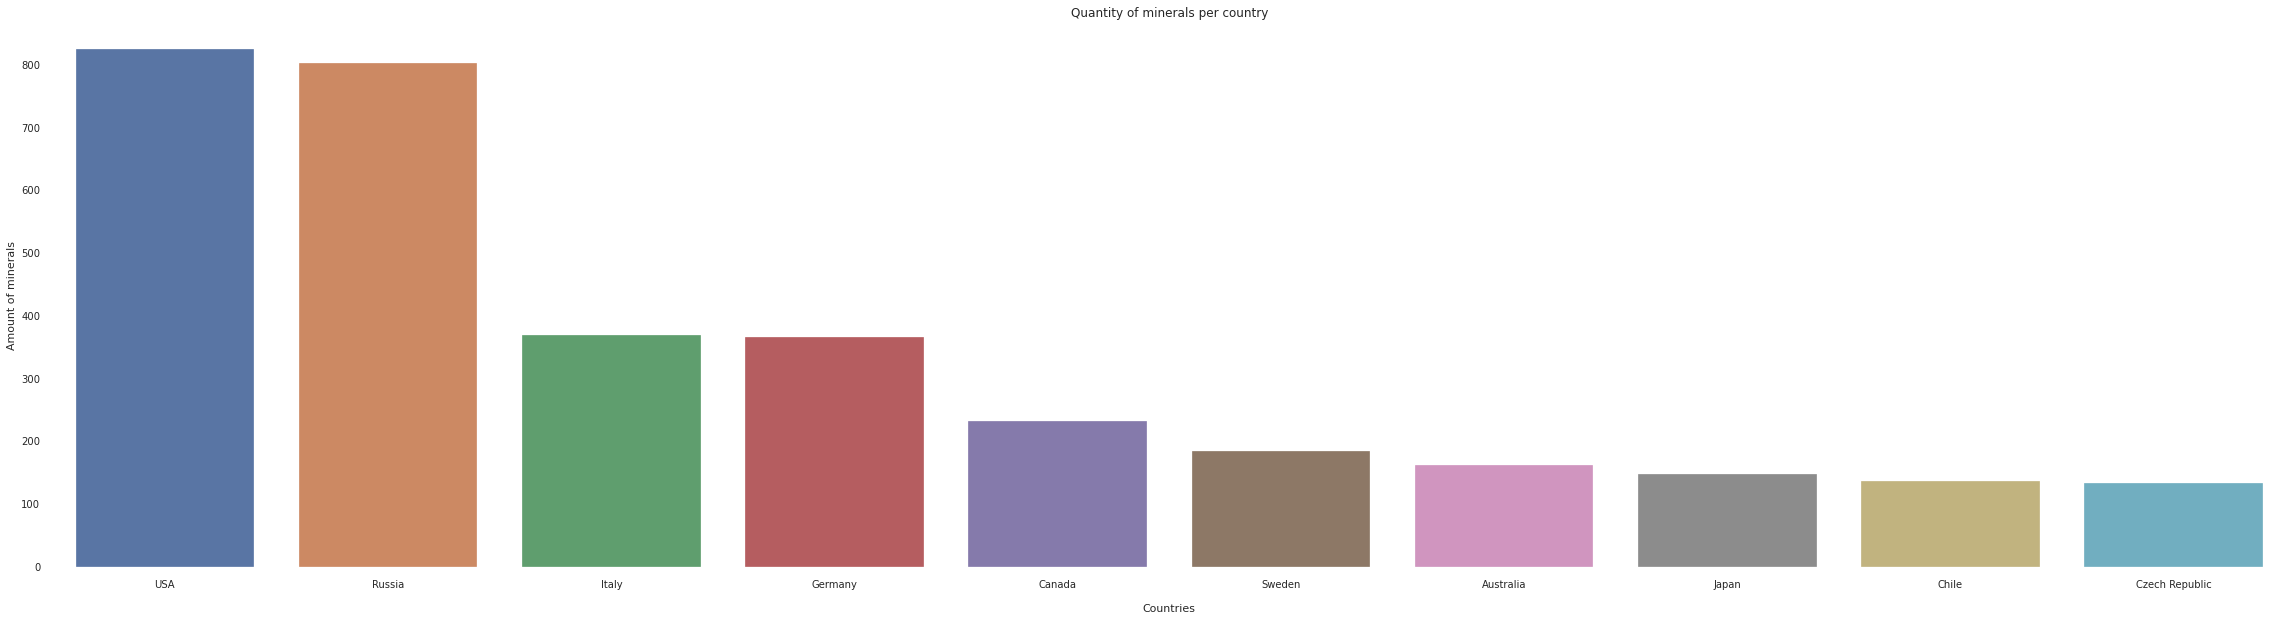

In [28]:
plt.figure(figsize=(40,10))
plt.title("Quantity of minerals per country")
sns.barplot(x=countries_splited['Country'].value_counts()[0:10].index, y=countries_splited['Country'].value_counts()[0:10])
plt.ylabel("Amount of minerals")
plt.xlabel("Countries", labelpad=14)

In [29]:
countries_splited['Country'].value_counts()[0:10]

USA               825
Russia            803
Italy             370
Germany           366
Canada            233
Sweden            185
Australia         162
Japan             148
Chile             137
Czech Republic    133
Name: Country, dtype: int64

********

# Elements<a id="plotelement" ></a><br>

Merging countries_splited and elements_splited

In [30]:
countries_splited['Country'].value_counts()

USA         825
Russia      803
Italy       370
Germany     366
Canada      233
           ... 
Barbados      1
Denmark       1
Libya         1
Ethiopia      1
Paraguay      1
Name: Country, Length: 130, dtype: int64

In [31]:
elements_splited['Element'].value_counts()

O     4687
H     3250
Si    1658
Ca    1460
Fe    1266
      ... 
Gd       1
Dy       1
Hf       1
Ln       1
Er       1
Name: Element, Length: 74, dtype: int64

In [32]:
filtro_1 = countries_splited['Country'].map(countries_splited['Country'].value_counts()) >= 200
elem_1 = countries_splited[filtro_1]

filtro_2 = elements_splited['Element'].map(elements_splited['Element'].value_counts()) >= 500
elem_2 = elements_splited[filtro_2]

plot_country_elem = pd.merge(elem_1, elem_2, on='Mineral')

plot_country_elem

,Mineral,Country,Element
0,Abelsonite,USA,H
1,Abenakiite-(Ce),Canada,Na
2,Abenakiite-(Ce),Canada,Si
3,Abenakiite-(Ce),Canada,O
4,Abenakiite-(Ce),Canada,P
...,...,...,...
9474,Zvyaginite,Russia,H
9475,Zvyagintsevite,Russia,Pb
9476,Zwieselite,Germany,Fe
9477,Zwieselite,Germany,P


O     2184
H     1516
Si     790
Ca     692
Na     624
S      557
Fe     509
Al     504
Mg     350
K      337
P      324
Cu     308
Mn     298
As     269
Pb     217
Name: Element, dtype: int64

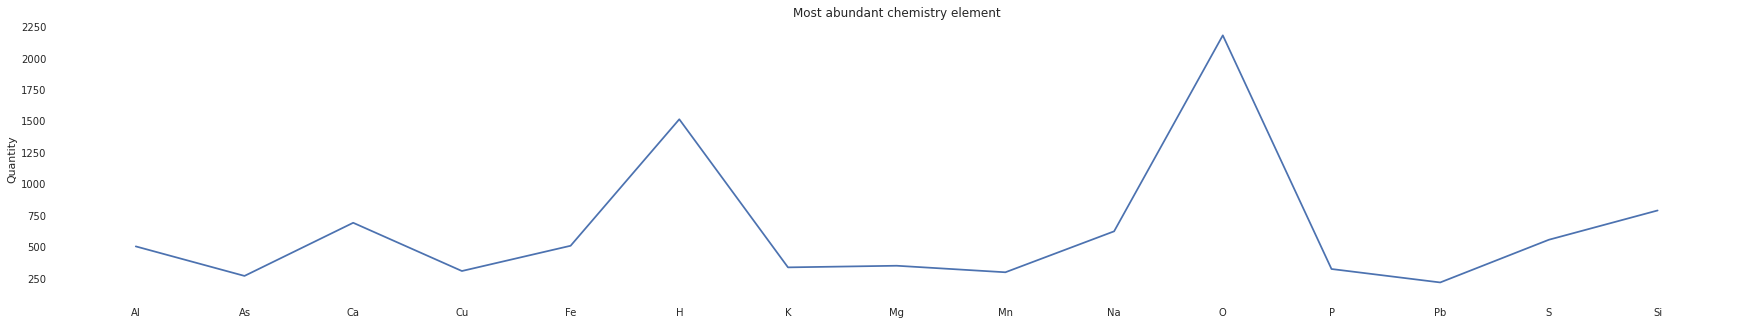

In [33]:
plt.figure(figsize=(30,5))
plt.title("Most abundant chemistry element")
sns.lineplot(data=plot_country_elem.Element.value_counts())
plt.ylabel("Quantity")
plot_country_elem.Element.value_counts()

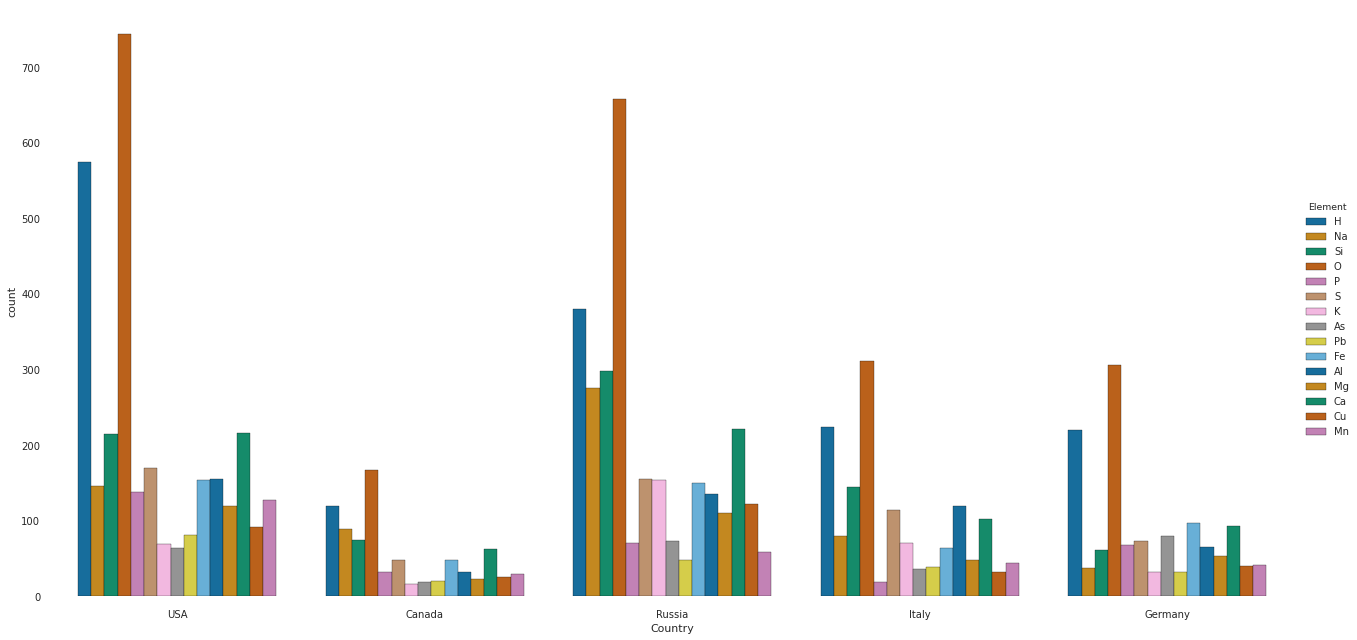

In [34]:
# Edited from Daria Chemkaeva, (2020).

sns.catplot(x="Country", hue="Element", kind="count", palette="colorblind", edgecolor=".01", data=plot_country_elem, height=9, aspect=2)

********

# Age<a id="plotage" ></a><br>

In [35]:
oldest_min = age_removed.groupby('Mineral')[['Country', 'Age (Ma)']].max()

oldest_min = oldest_min.sort_values(by='Age (Ma)', ascending=False)

oldest_min_notna = oldest_min[~oldest_min['Country'].str.contains('unknown')]

oldest_min_notna[0:10]

,Country,Age (Ma)
Mineral,,
Tochilinite,Russia,4700.0
Machiite,Australia,4700.0
Troilite,Italy (meteorite),4700.0
Forsterite,Italy,4700.0
Warkite,Australia (meteorite) / Italy (meteorite),4700.0
Aragonite,Spain,4700.0
Pentlandite,United Kingdom,4700.0
Perovskite,Russia,4700.0
Corundum,India ?,4700.0


Text(0, 0.5, 'Quantity')

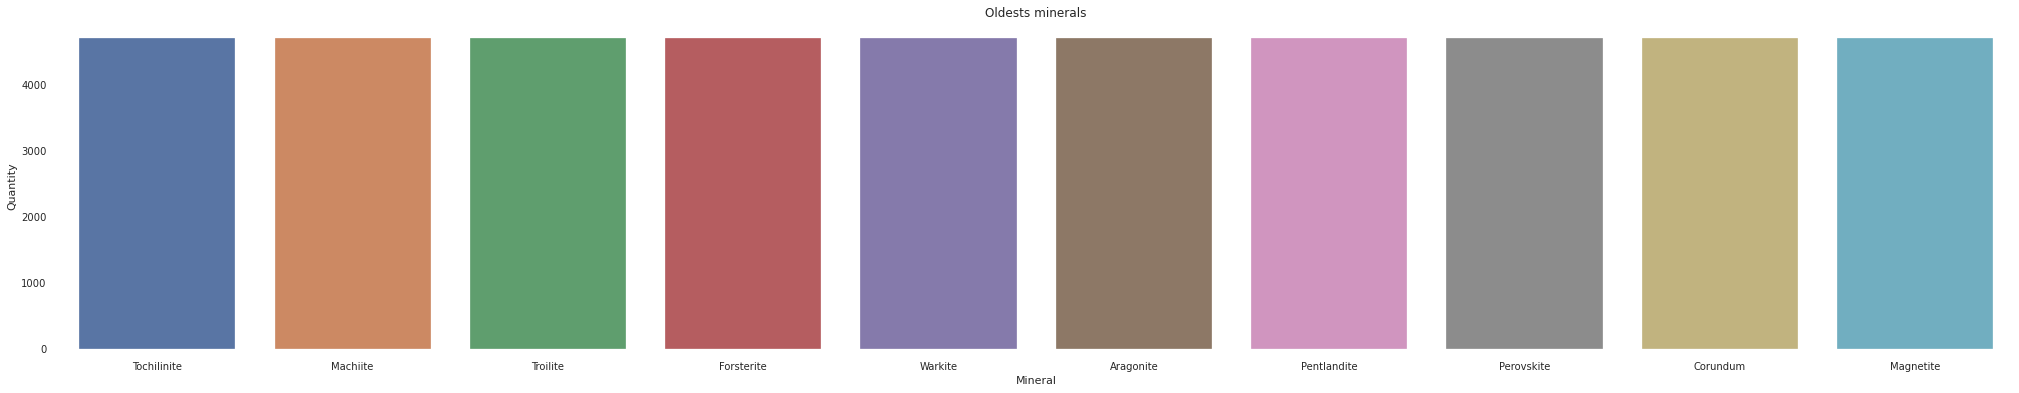

In [36]:
plt.figure(figsize=(35,6))
plt.title("Oldests minerals")
sns.barplot(x=oldest_min_notna[0:10].index, y=oldest_min_notna['Age (Ma)'][0:10])
plt.ylabel("Quantity")

Text(0, 0.5, 'Age (Ma)')

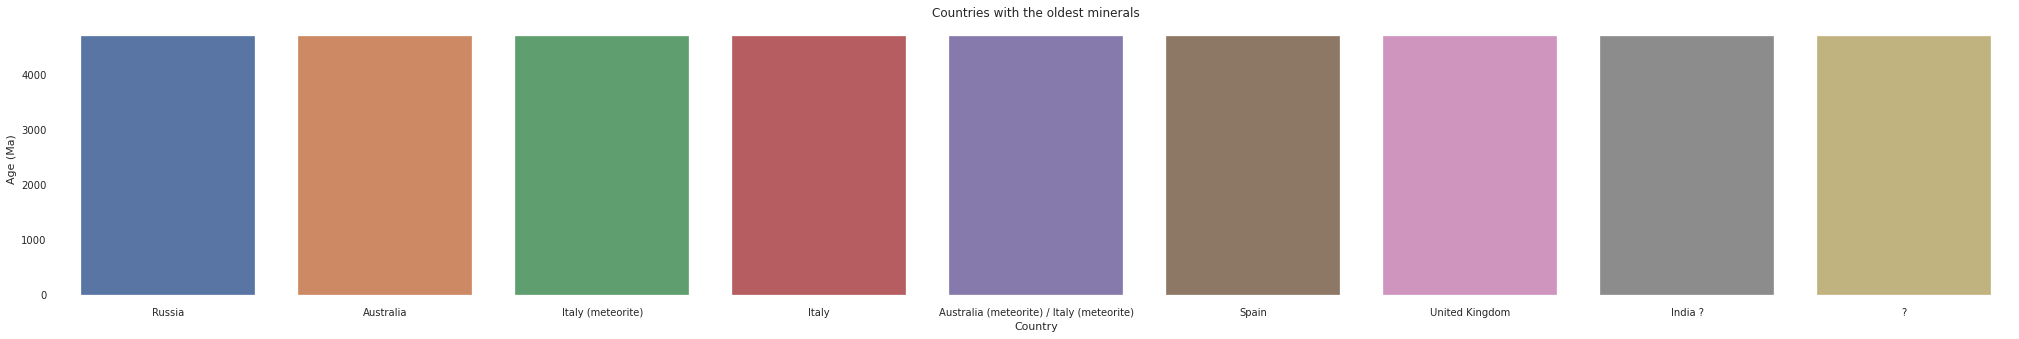

In [37]:
plt.figure(figsize=(35,5))
plt.title("Countries with the oldest minerals")
sns.barplot(x=oldest_min_notna['Country'][0:10], y=oldest_min_notna['Age (Ma)'])
plt.ylabel("Age (Ma)")

In [38]:
age_group = oldest_min_notna.groupby('Mineral')[['Country', 'Age (Ma)']].max()
x = age_group.groupby(['Age (Ma)', 'Country'])['Age (Ma)'].unique()        #.apply(lambda df: df['Age (Ma)']).sort_values()
x.sort_values(ascending=False)


Age (Ma)     Country                     
4700.000000  United Kingdom                   [4700.0]
             France                           [4700.0]
             ?                                [4700.0]
             Algeria (meteorite) / Israel     [4700.0]
             Australia                        [4700.0]
                                               ...    
0.000036     Russia                          [3.6e-05]
             Italy                           [3.6e-05]
             Iceland                         [3.6e-05]
             El Salvador                     [3.6e-05]
             Chile                           [3.6e-05]
Name: Age (Ma), Length: 2263, dtype: object

********

# **RESULTS**<a id="results" ></a><br>

# 1. Minerals provided by different countries.<a id="mineralscountry" ></a><br>


USA               825
Russia            803
Italy             370
Germany           366
Canada            233
Sweden            185
Australia         162
Japan             148
Chile             137
Czech Republic    133
Name: Country, dtype: int64

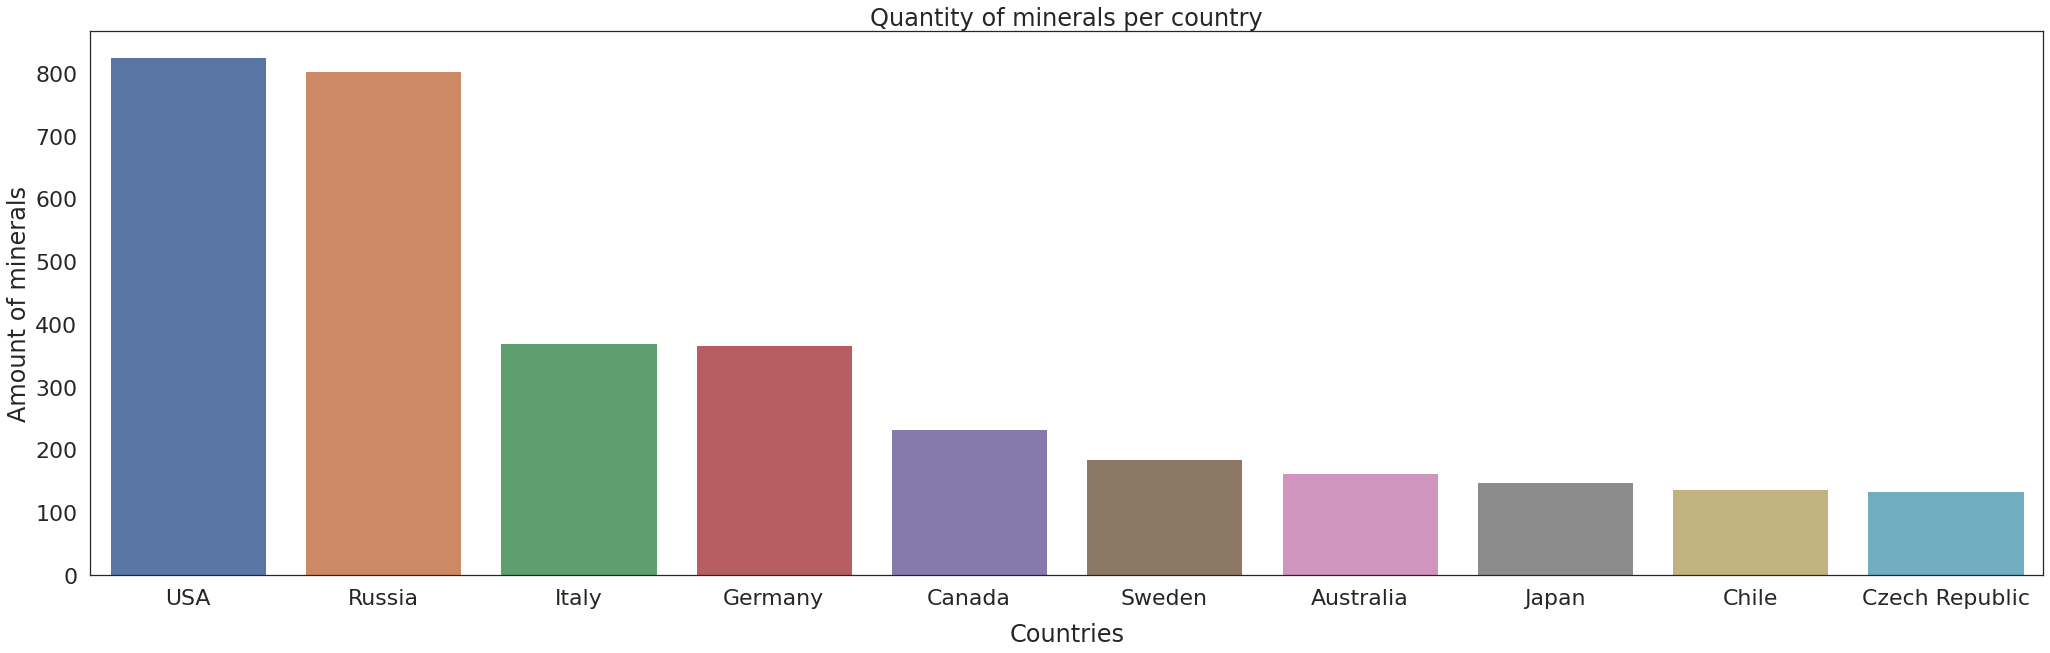

In [39]:
sns.set(font_scale=2)
sns.set_style("white")
plt.figure(figsize=(35,10))
plt.title("Quantity of minerals per country")
sns.barplot(x=countries_splited['Country'].value_counts()[0:10].index, y=countries_splited['Country'].value_counts()[0:10])
plt.ylabel("Amount of minerals")
plt.xlabel("Countries", labelpad=14)
countries_splited['Country'].value_counts()[0:10]

**Mineras provided by countries**
1. **United States of America**: 825 minerals.
2. **Russia**: 803 minerals.
3. **Italy**: 370 minerals.

********

# 2. Most abundant chemistry element.<a id="elementabundant" ></a><br>

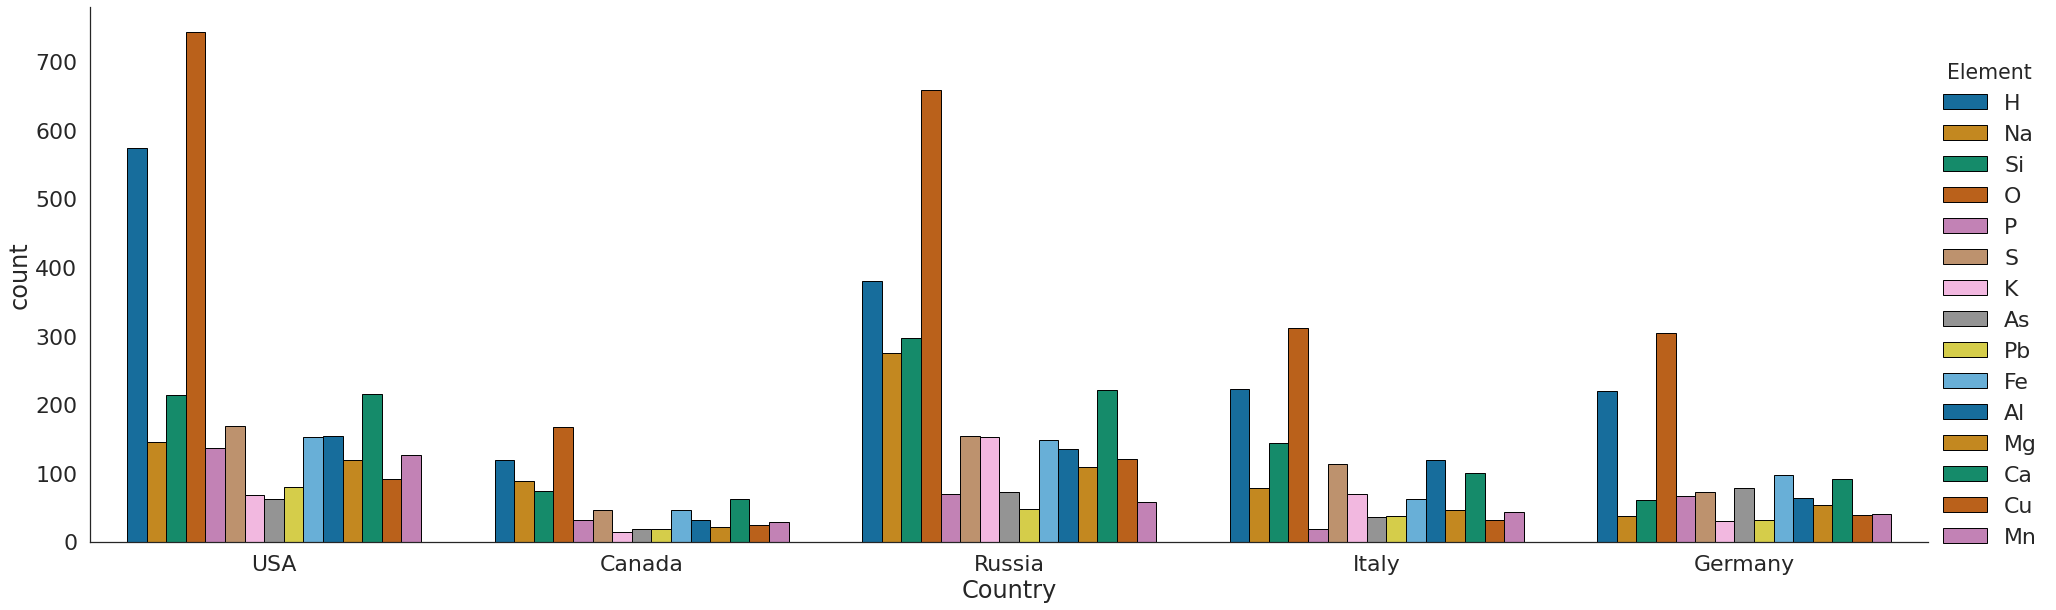

In [40]:
filtro_1 = countries_splited['Country'].map(countries_splited['Country'].value_counts()) >= 200
elem_1 = countries_splited[filtro_1]

filtro_2 = elements_splited['Element'].map(elements_splited['Element'].value_counts()) >= 500
elem_2 = elements_splited[filtro_2]

sns.set(font_scale=2)
sns.set_style("white")
plot_country_elem = pd.merge(elem_1, elem_2, on='Mineral')

sns.catplot(x="Country", hue="Element", kind="count", palette="colorblind", edgecolor=".01", data=plot_country_elem, height=9, aspect=3)

**United States of America has more elements, since they are the country with more minerals**

O     2184
H     1516
Si     790
Ca     692
Na     624
S      557
Fe     509
Al     504
Mg     350
K      337
P      324
Cu     308
Mn     298
As     269
Pb     217
Name: Element, dtype: int64

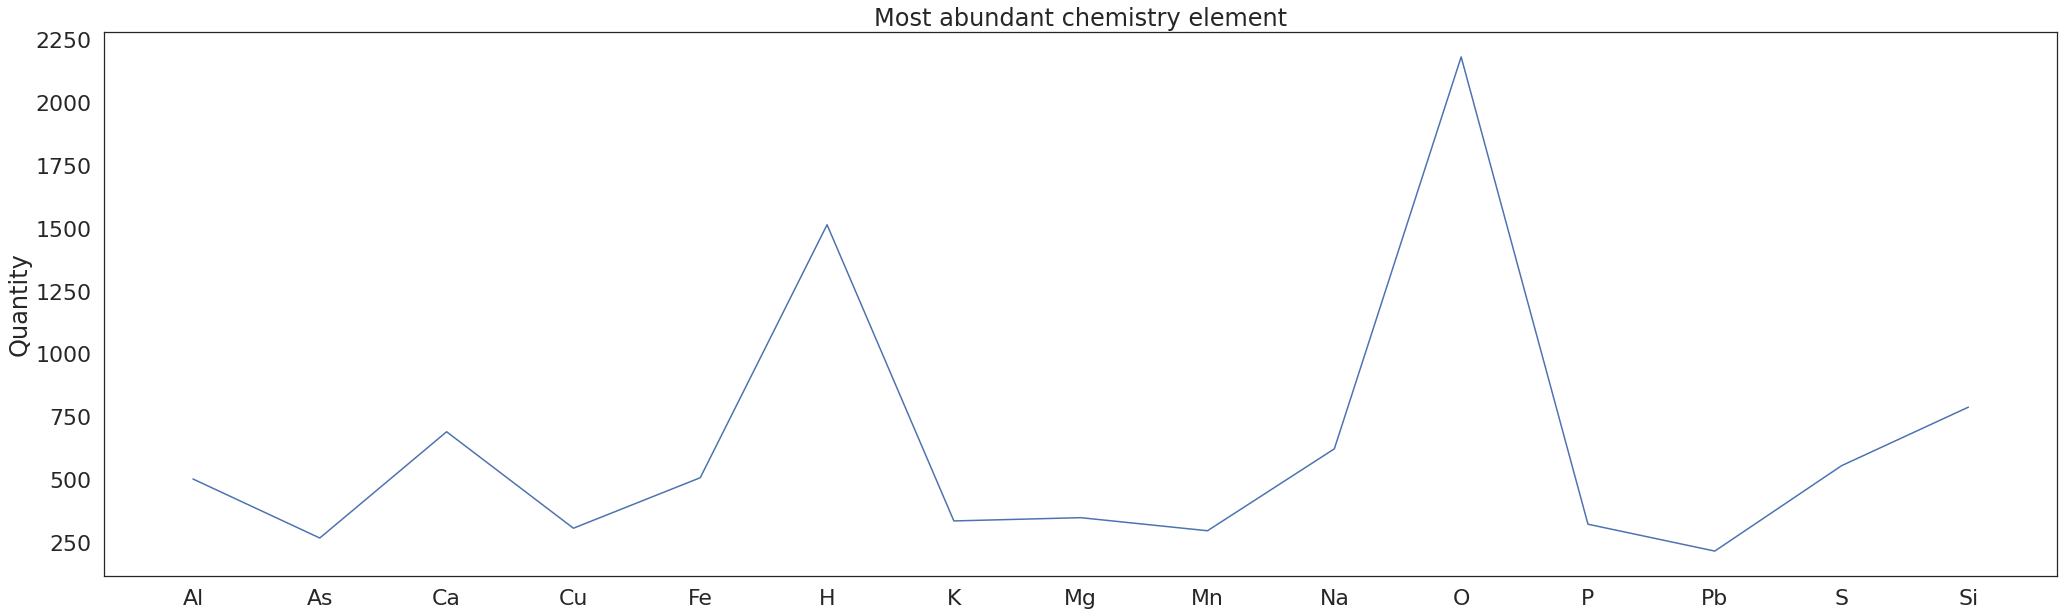

In [41]:
sns.set(font_scale=2)
sns.set_style("white")
plt.figure(figsize=(35,10))
plt.title("Most abundant chemistry element")
sns.lineplot(data=plot_country_elem.Element.value_counts())
plt.ylabel("Quantity")

plot_country_elem.Element.value_counts()

**The most abundant element in the data is Oxygen**

****

# 3. Oldest mineral.<a id="oldestmineral" ></a><br>

Text(0, 0.5, 'Quantity')

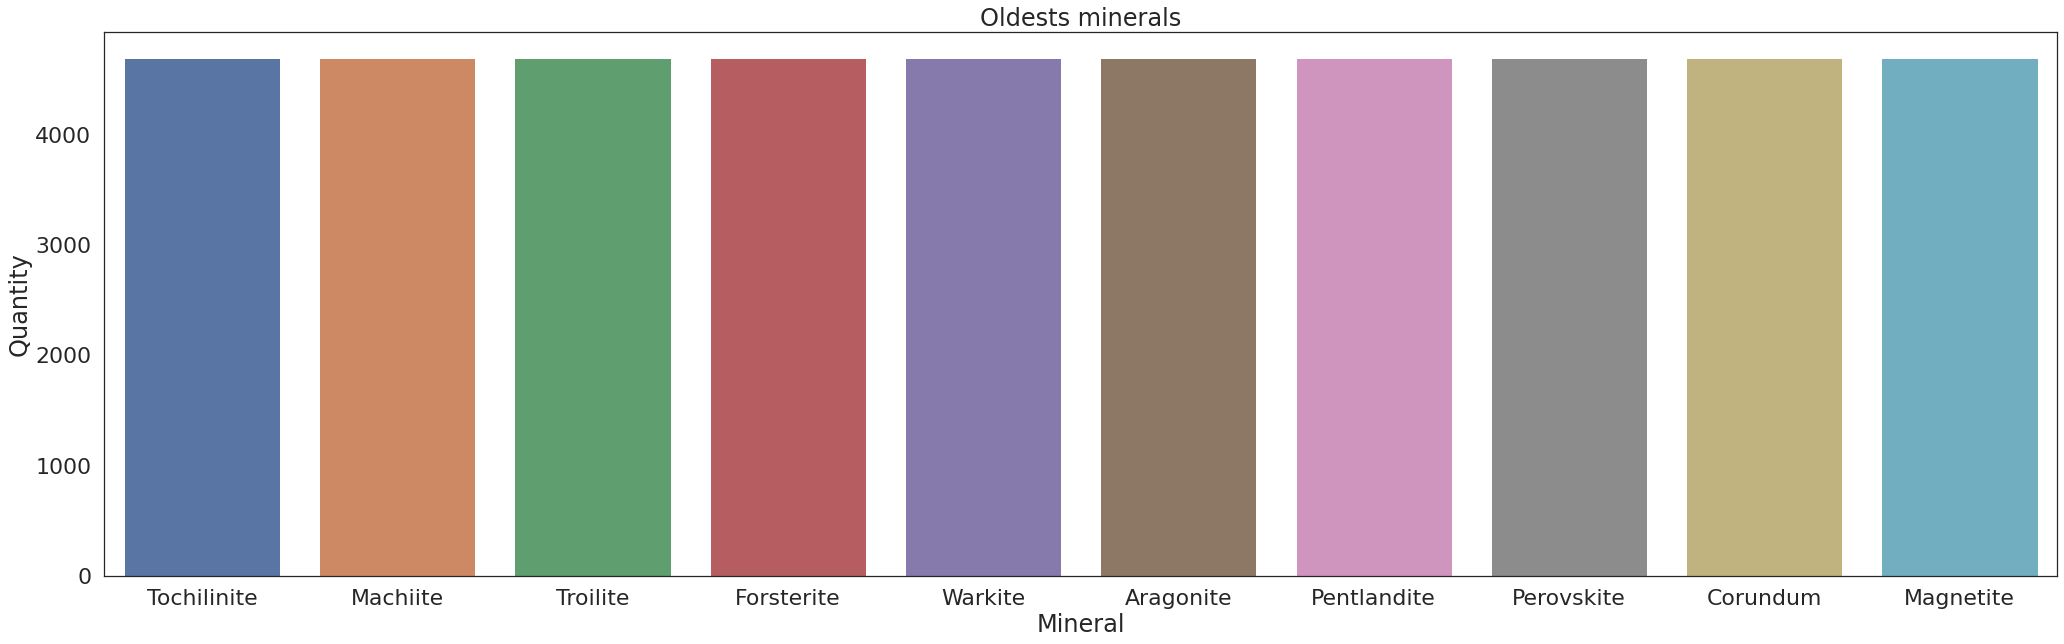

In [42]:
sns.set(font_scale=2)
sns.set_style("white")
plt.figure(figsize=(35,10))
plt.title("Oldests minerals")
sns.barplot(x=oldest_min_notna[0:10].index, y=oldest_min_notna['Age (Ma)'][0:10])
plt.ylabel("Quantity")


**This are the oldest minerals in the data, with an age of 4.7 Ma:**
1. **Tochilinite**
2. **Machiite**
3. **Troilite**
4. **Forsterite**
5. **Warkite**
6. **Aragonite**
7. **Pentlandite**
8. **Perovskite**
9. **Corundum**
10. **Magnetite**

Text(0, 0.5, 'Age (Ma)')

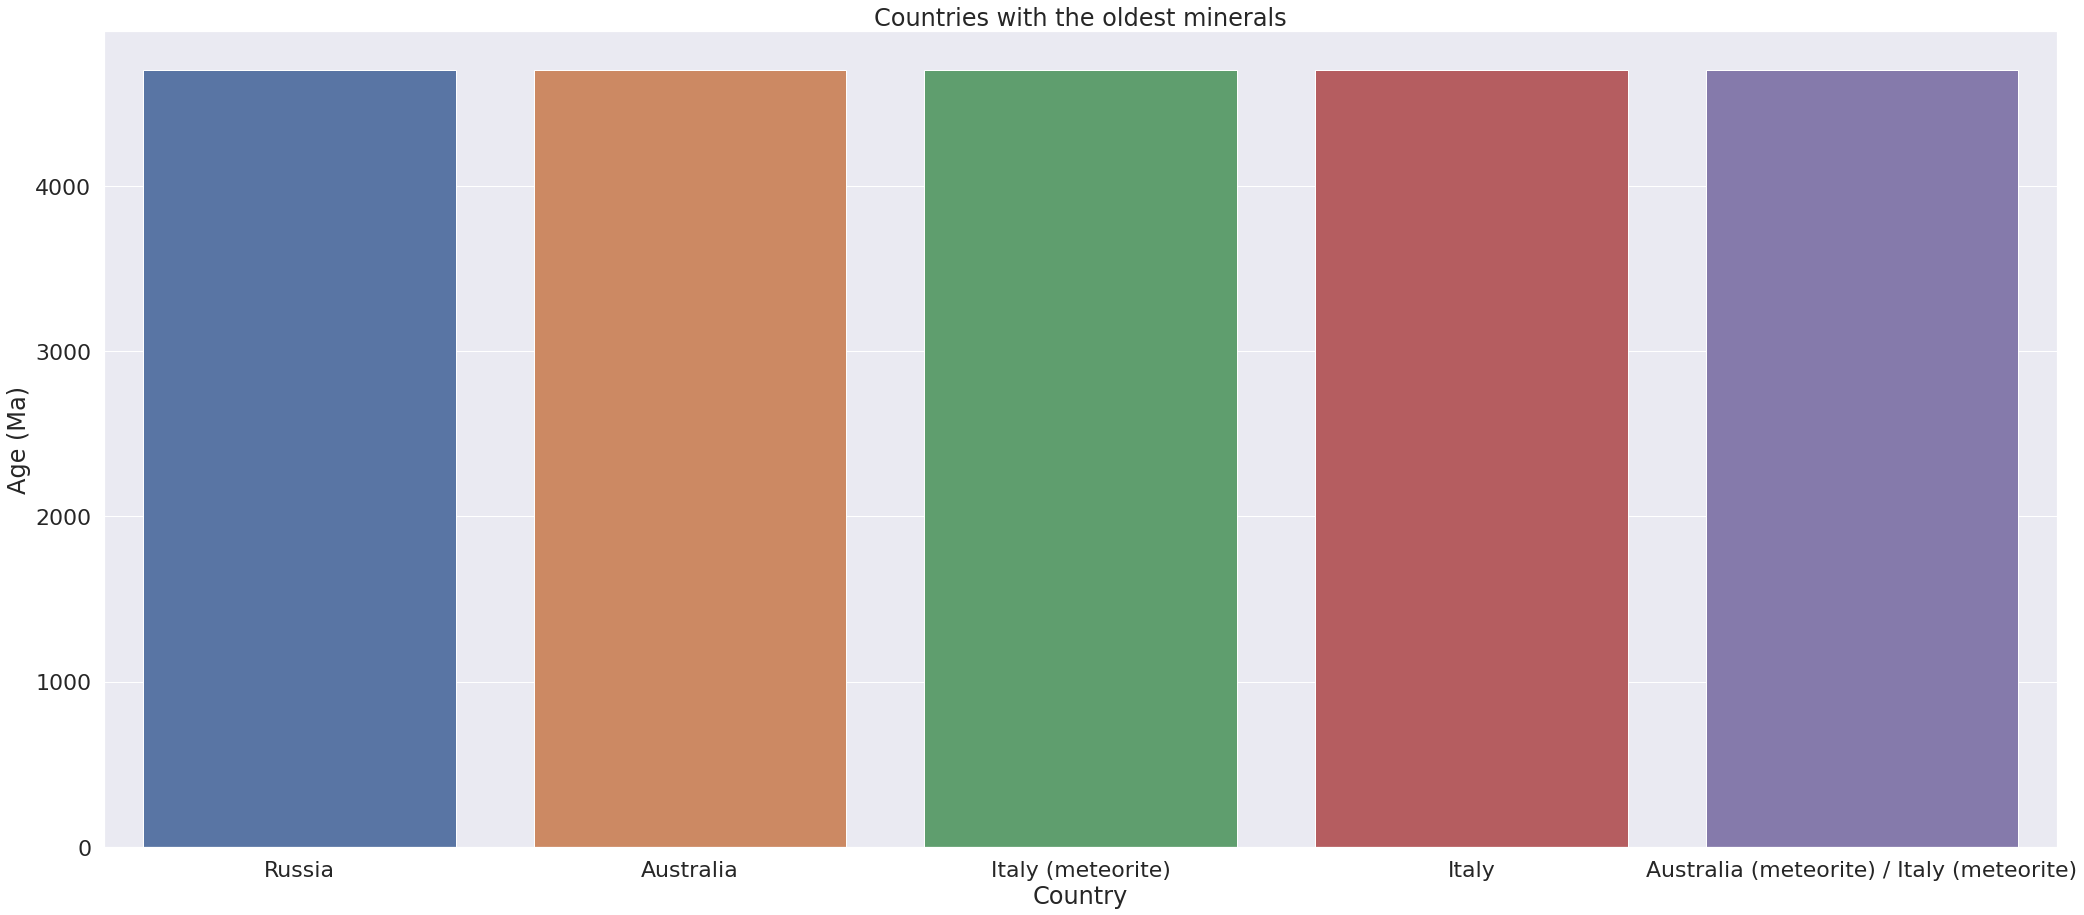

In [43]:
sns.set(font_scale=2)
plt.figure(figsize=(35,15))
plt.title("Countries with the oldest minerals")
sns.barplot(x=oldest_min_notna['Country'][0:5], y=oldest_min_notna['Age (Ma)'])
plt.ylabel("Age (Ma)")

**Countries having the oldest minerals in the data:**

1. **Russia**
2. **Australia**
3. **Italy (Meteorite)**
4. **Italy**
5. **Australia (Meteorite)/ Italy (Meteorite)**

413.600000     143
0.000036       119
541.000000     107
2500.000000    106
354.000000      99
              ... 
61.600000        1
2240.000000      1
928.000000       1
608.000000       1
444.700000       1
Name: Age (Ma), Length: 642, dtype: int64

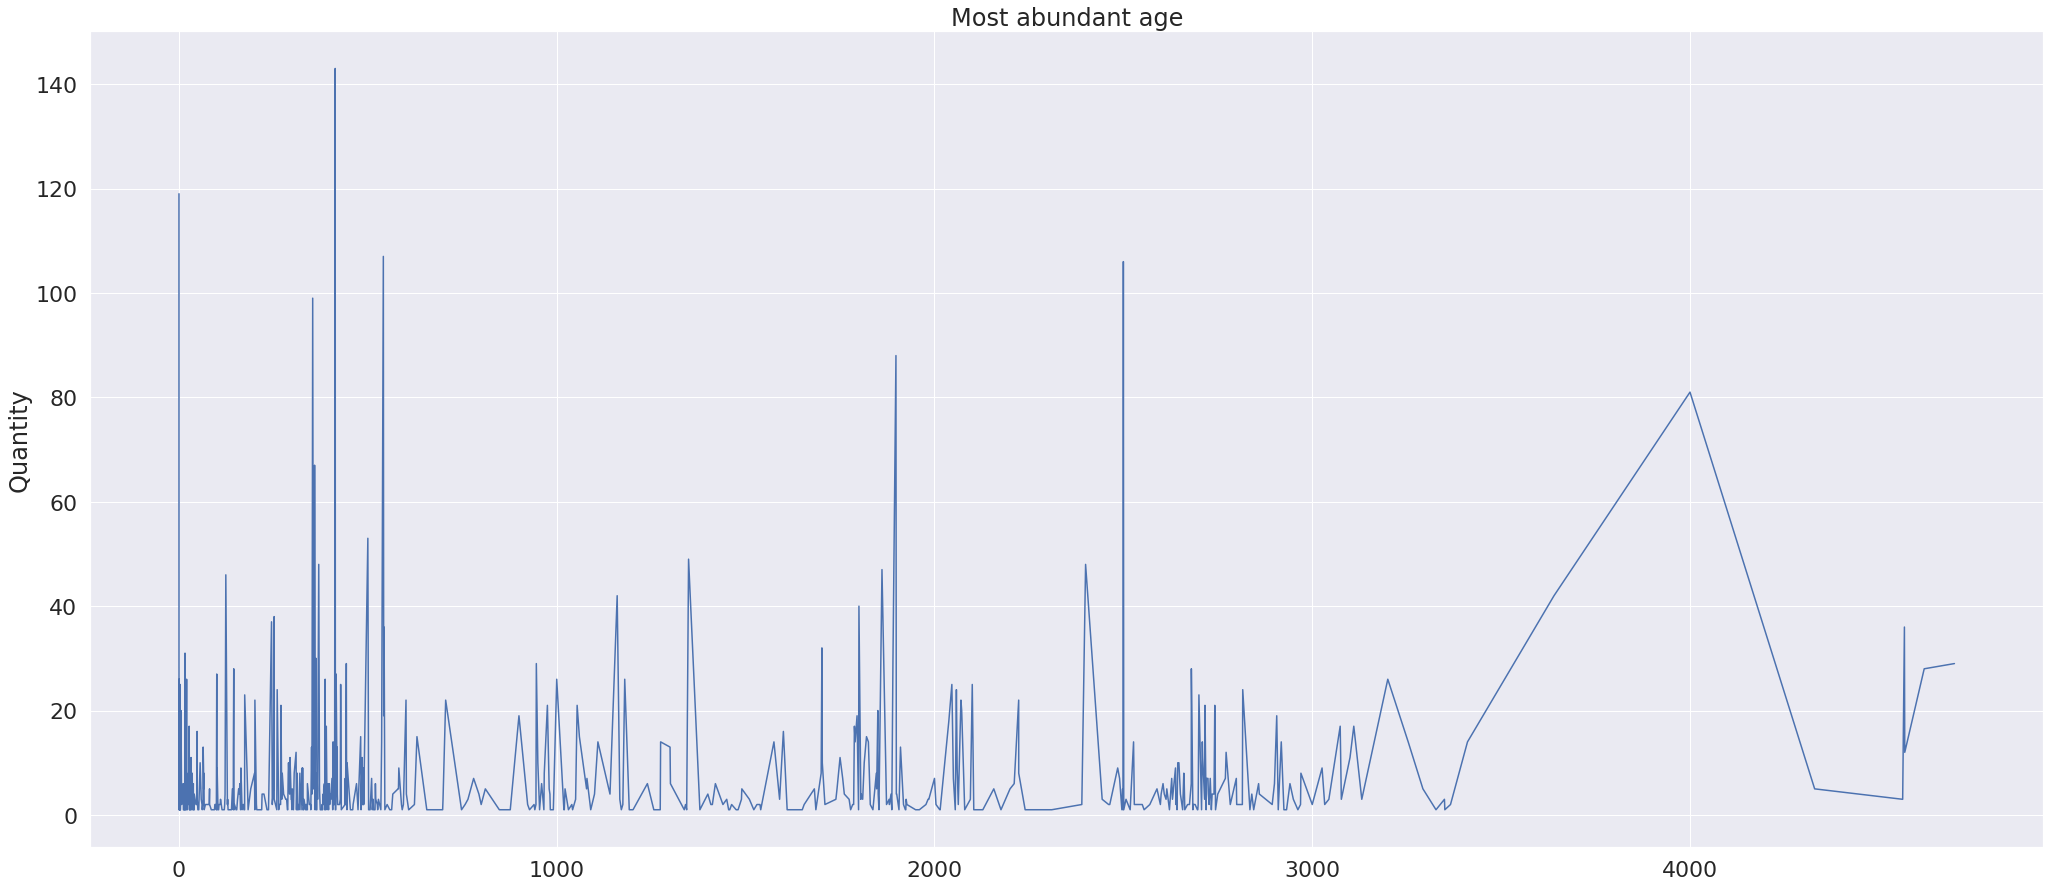

In [44]:
sns.set(font_scale=2)
plt.figure(figsize=(35,15))
plt.title("Most abundant age")
sns.lineplot(data=oldest_min_notna['Age (Ma)'].value_counts())
plt.ylabel("Quantity")

oldest_min_notna['Age (Ma)'].value_counts(ascending=False)

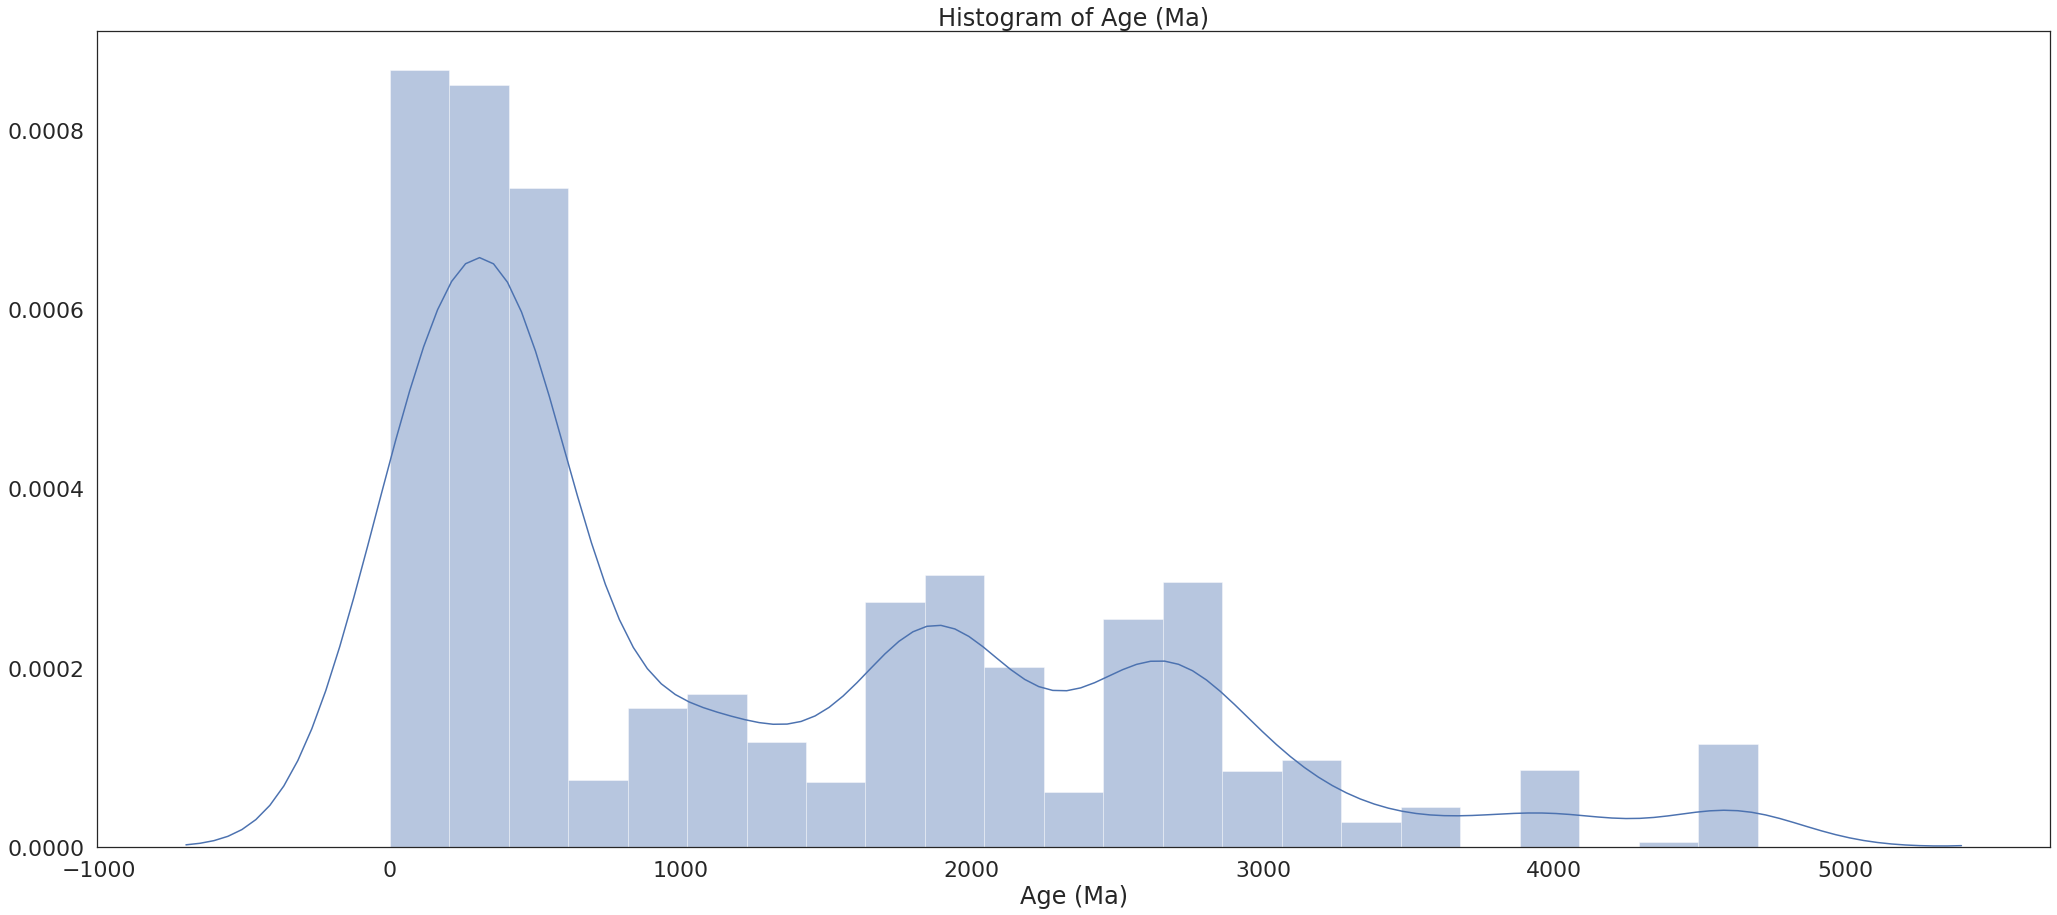

In [45]:
sns.set(font_scale=2)
sns.set_style("white")
plt.figure(figsize=(35,15))
sns.distplot(a=oldest_min_notna['Age (Ma)'], kde=True)
plt.title("Histogram of Age (Ma)")
plt.legend()

**The Age (Ma) values spread from 0<x<4700 Ma. Most of the values are between 0 and 600 Ma.**

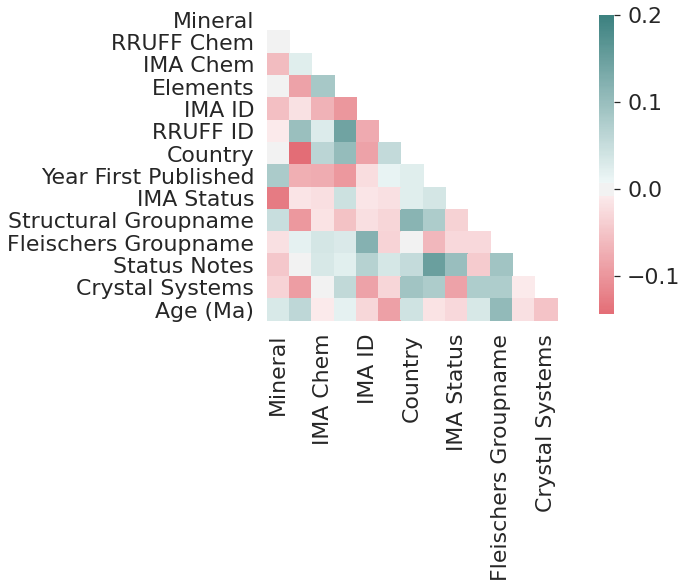

In [46]:
sns.set_style(style="white")
rs = np.random.RandomState(5000)
new_data = pd.DataFrame(data=rs.normal(size=(200, 14)), columns=list(minerals.columns))
corr = new_data.corr()
matrix = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(7, 10))
cmap = sns.diverging_palette(10, 190, as_cmap=True)
sns.heatmap(corr, mask=matrix, cmap=cmap, vmax=.2, center=0, square=True, cbar_kws={"shrink": .55})



# **FURTHER IMPROVEMENTS**

*  **Fix Age (Ma). Some minerals ages (more than 130) indicate the extraterrestrial origin (meteorites) but the country does not. Earth is 4550 Ma. Ages >4550 Ma indicate that the mineral was contained on a meteorite.**

****

******** 

# **PROFILE REPORT**<a id="report" ></a><br>

In [47]:
rep = ProfileReport(minerals)
rep.to_file(output_file='report.html')

In [48]:
rep

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# **REFERENCES**<a id="references" ></a><br>

* **Thorough EDA with a single line, pandas profiling**: https://www.kaggle.com/frtgnn/thorough-eda-with-a-single-line-pandas-profiling/
* **Guide for Comprehensive Data Exploration in Python**: https://www.kaggle.com/vikumsw/guide-for-comprehensive-data-exploration-in-python#Table-Of-Contents
* **Comprehensive data exploration with Python**: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
* **Daria Chemkaeva**: https://www.kaggle.com/lsind18